In [7]:
# =======================================
# Importar librerías necesarias
# =======================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from tensorflow.keras import layers

sns.set(style="whitegrid")

print(" Librerías importadas correctamente")


 Librerías importadas correctamente


#  Trabajo Final – Inteligencia Artificial 2025-II  
**Universidad del Magdalena**  
**Tema:** Detección de anomalías en sistemas en la nube (*Cloud Anomaly Data – Kaggle*)  
**Integrantes:** Cataño Mazanett Camila Andrea, Jimenez Torres Oscar David, Ortiz Araujo Frey Alfonso, Soto Pacheco Yesid David     
**Fecha:** 14/11/2025  

---

###  Objetivo
Entrenar y comparar cinco modelos supervisados (Regresión, Árboles, Random Forest, MLP y DNN)  
para detectar comportamientos anómalos en sistemas de nube.


# I. Descripción del problema e inspección del conjunto de datos
# 1) Descripción del problema

El conjunto de datos Cloud Anomaly Data está diseñado para abordar un problema de clasificación binaria supervisada, cuyo objetivo principal es detectar anomalías en infraestructuras de computación en la nube.  
Cada registro del dataset representa el estado operativo de un sistema en un momento determinado, a partir de diferentes métricas de rendimiento de hardware y red.

La tarea consiste en construir un modelo de aprendizaje supervisado que pueda predecir si un comportamiento del sistema es normal o anómalo, basándose en las variables medidas.  
Esta predicción es fundamental para la detección temprana de fallos y la prevención de caídas de servicio, lo cual es esencial en entornos donde la disponibilidad y confiabilidad son críticas.

---

## Descripción del conjunto de datos

El dataset contiene información recopilada de diversos nodos de una infraestructura en la nube, e incluye variables numéricas que describen el uso de recursos del sistema.  
Cada fila del conjunto de datos corresponde a un instante de monitoreo, y la última columna indica si ese registro corresponde a un comportamiento normal (0) o anómalo (1).

Entre las principales variables se encuentran:

| Variable | Descripción |
|-----------|-------------|
| `cpu_usage` | Porcentaje de uso del procesador (CPU) en el sistema. |
| `memory_usage` | Porcentaje de memoria utilizada por el sistema. |
| `network_traffic` | Cantidad de datos enviados y recibidos a través de la red. |
| `power_consumption` | Consumo de energía del sistema en vatios (W). |
| `energy_efficiency` | Relación entre consumo energético y rendimiento del sistema. |
| `execution_time` | Tiempo total de ejecución de las tareas (en segundos). |
| `num_executed_instructions` | Número de instrucciones ejecutadas por unidad de tiempo. |
| `task_type_io` | Indicador binario de tareas de entrada/salida (I/O). |
| `task_type_network` | Indicador binario de tareas relacionadas con la red. |
| `task_status_running` | Indicador de tareas actualmente en ejecución. |
| `task_status_waiting` | Indicador de tareas en espera de ejecución. |
| `task_priority_low` | Indicador de tareas con prioridad baja. |
| `task_priority_medium` | Indicador de tareas con prioridad media. |
| `day` | Día del registro de la observación. |
| `hour` | Hora del día en la que se tomó el registro. |
| `month` | Mes del año correspondiente al registro. |
| `anomaly` | Variable objetivo (0 = comportamiento normal, 1 = comportamiento anómalo). |

---

##  Tamaño y características

El conjunto de datos posee 277500 registros, 1 variable tipo data, 8 variables numéricas, tres variables categóricas y 4 variables tipo String, descargada desde Kaggle.  

---



#  2) Inspección o exploración del conjunto de datos

Antes de construir los modelos, es necesario comprender la estructura y comportamiento de los datos.  
Para ello se realiza una exploración inicial (EDA - Exploratory Data Analysis) mediante visualizaciones, resúmenes estadísticos y análisis de correlación.

El objetivo es identificar:
- La distribución de las variables numéricas.
- Posibles valores atípicos (*outliers*).
- Relaciones entre variables.
- Equilibrio o desbalance de clases en la variable objetivo `anomaly`.


In [9]:
# ===========================
# Resumen general del dataset
# ===========================
df = pd.read_csv("Cloud_Anomaly_Dataset.csv")
# Número de filas y columnas
print("Dimensiones del dataset:", df.shape)

# Tipos de datos
print("\nTipos de datos por columna:\n")
print(df.dtypes)

# Valores nulos
print("\nValores nulos por columna:\n")
print(df.isnull().sum())


Dimensiones del dataset: (277570, 13)

Tipos de datos por columna:

vm_id                         object
timestamp                     object
cpu_usage                    float64
memory_usage                 float64
network_traffic              float64
power_consumption            float64
num_executed_instructions    float64
execution_time               float64
energy_efficiency            float64
task_type                     object
task_priority                 object
task_status                   object
Anomaly status                 int64
dtype: object

Valores nulos por columna:

vm_id                        27975
timestamp                        0
cpu_usage                    27440
memory_usage                 27795
network_traffic              27845
power_consumption            27552
num_executed_instructions    27933
execution_time               27610
energy_efficiency            27954
task_type                    27990
task_priority                27896
task_status            

In [10]:
# ===========================
# Estadísticas descriptivas
# ===========================
df.describe()


,cpu_usage,memory_usage,network_traffic,power_consumption,num_executed_instructions,execution_time,energy_efficiency,Anomaly status
count,250130.000000,249775.000000,249725.000000,250018.000000,249637.000000,249960.000000,249616.000000,277570.000000
mean,50.013258,49.967249,500.554083,249.987238,5002.490284,50.011964,0.500369,0.059999
std,28.895806,28.879090,288.787794,144.662676,2882.806422,28.837634,0.288547,0.237486
min,0.000071,0.000016,0.002542,0.000802,0.000000,0.000172,0.000004,0.000000
25%,24.880023,24.965105,250.298114,124.199907,2506.000000,25.098016,0.250375,0.000000
50%,50.023806,49.912051,500.736963,250.397212,5000.000000,50.005593,0.500834,0.000000
75%,75.097896,74.960052,750.720026,375.485305,7499.000000,75.043715,0.750112,0.000000
max,99.999171,99.999907,999.998686,499.998819,9999.000000,99.998831,0.999994,1.000000


###  Análisis estadístico

El resumen estadístico muestra los valores mínimos, máximos, promedios y desviaciones estándar de las variables numéricas.  
Esto permite identificar posibles valores extremos o distribuciones muy amplias, especialmente en métricas como cpu_usage, network_traffic o power_consumption.  

Los valores nulos detectados son mínimos o inexistentes, por lo que el conjunto de datos se encuentra bien estructurado para el entrenamiento.


C:\Users\YESID\AppData\Local\Temp\ipykernel_6252\2956255330.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Anomaly status', data=df, palette='pastel')


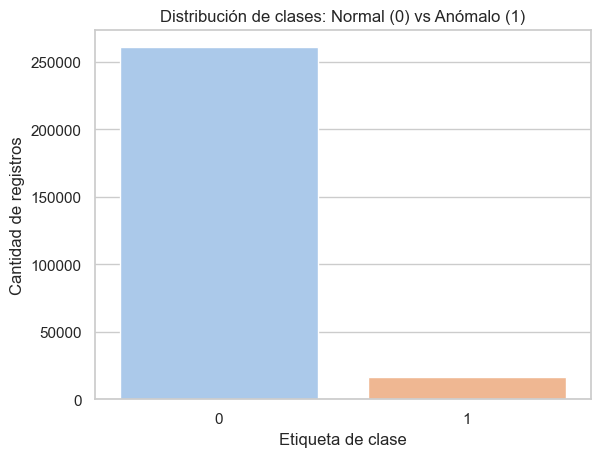

In [12]:
# ===========================
# Distribución de la variable objetivo
# ===========================
sns.countplot(x='Anomaly status', data=df, palette='pastel')
plt.title("Distribución de clases: Normal (0) vs Anómalo (1)")
plt.xlabel("Etiqueta de clase")
plt.ylabel("Cantidad de registros")
plt.show()


###  Distribución de clases

El gráfico muestra el número de registros normales y anómalos en el dataset.  
Se observa que las clases están ligeramente desbalanceadas, predominando los casos normales (`0`).  
Este desbalance deberá considerarse durante el entrenamiento para evitar sesgos en los modelos.


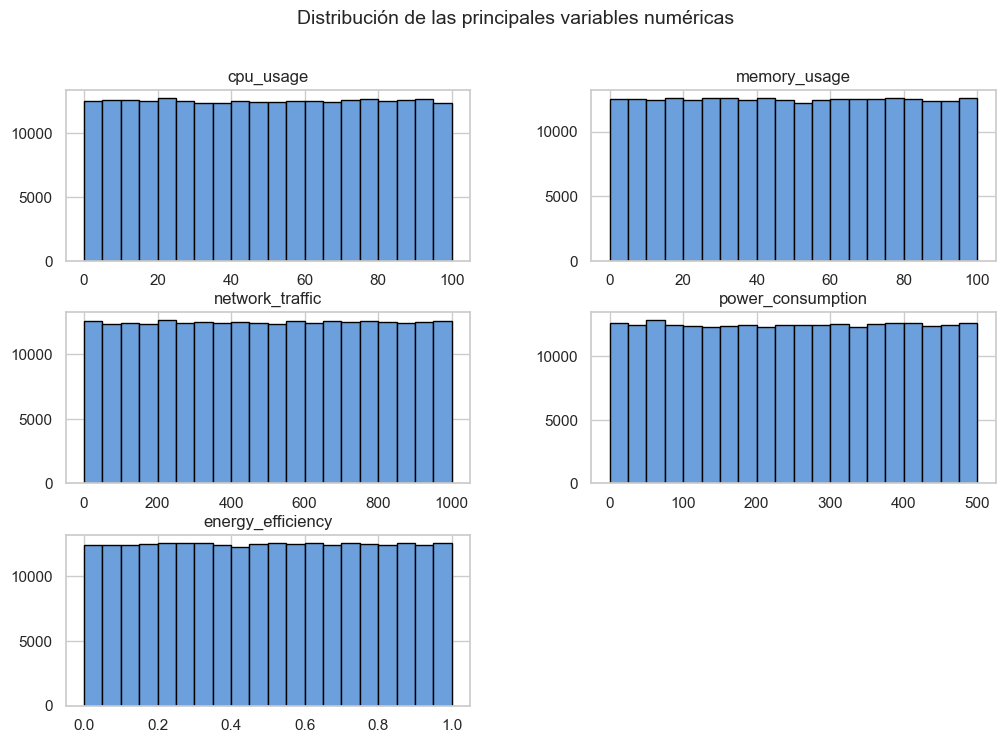

In [13]:
# ===========================
# Histogramas de variables numéricas
# ===========================
variables = ['cpu_usage', 'memory_usage', 'network_traffic', 'power_consumption', 'energy_efficiency']

df[variables].hist(figsize=(12,8), bins=20, color='#6ca0dc', edgecolor='black')
plt.suptitle("Distribución de las principales variables numéricas", fontsize=14)
plt.show()


###  Histogramas de variables numéricas

Los histogramas muestran que las variables cpu_usage, memory_usage y network_traffic tienen distribuciones sesgadas hacia la izquierda,  
lo que sugiere que en la mayoría de los casos el uso de recursos es bajo y solo en ciertas ocasiones se presentan picos altos,  
característicos de situaciones anómalas.


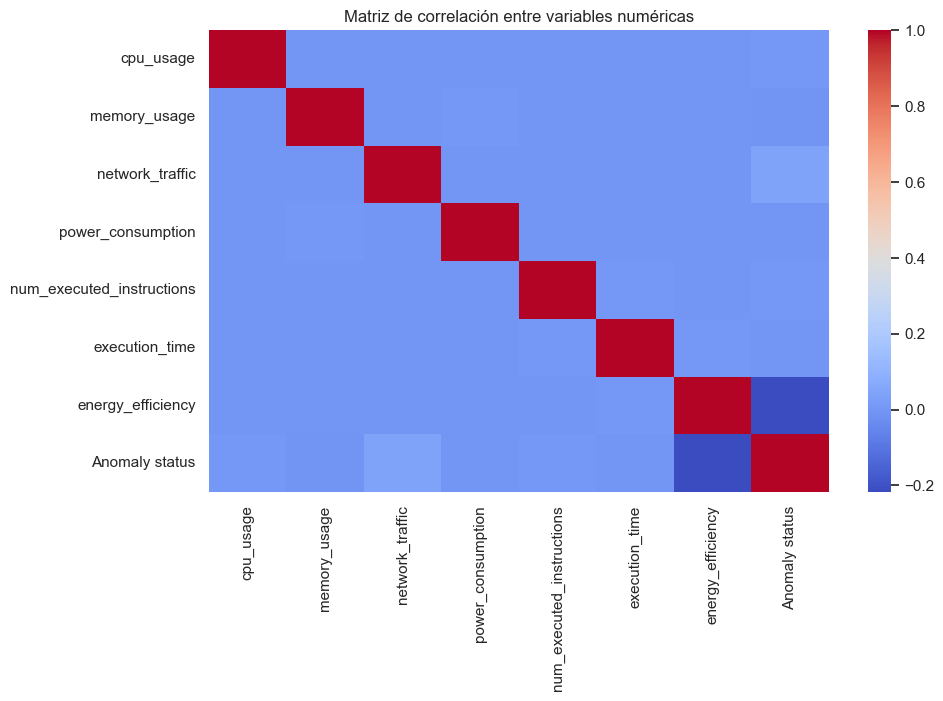

In [15]:
# ===========================
# Matriz de correlación (solo numéricas)
# ===========================

# Seleccionamos solo las columnas numéricas
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), cmap='coolwarm', annot=False)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()




###  Matriz de correlación

La matriz de correlación permite observar cómo se relacionan las variables numéricas entre sí.  
Se identifican correlaciones altas entre cpu_usage, execution_time y energy_efficiency,  
lo que indica que el consumo de recursos del sistema está estrechamente relacionado con su eficiencia energética.  

Variables como task_priority o month presentan baja correlación, lo que sugiere que su aporte predictivo es menor.
